# Automated Anomaly Detection
**Objective**: Understand and practice automated anomaly detection using various techniques.

**Task**: Automated Anomaly Detection using Z-score method

**Steps**:
1. Data Set: Download a dataset representing daily sales figures for a retail store.
2. Calculate Z-score: Compute the mean and standard deviation of the sales. Use these to
calculate the Z-score for each day's sales figure.
3. Identify Anomalies: Detect anomalies by identifying values with a Z-score above 3 or below -3.
4. Visualize: Plot a graph to visualize anomalies.

Anomalies Detected:
         Date  Sales   Z_score  Anomaly
10 2023-01-11  300.0  3.025174     True
25 2023-01-26   50.0 -4.420933     True
45 2023-02-15  320.0  3.620863     True


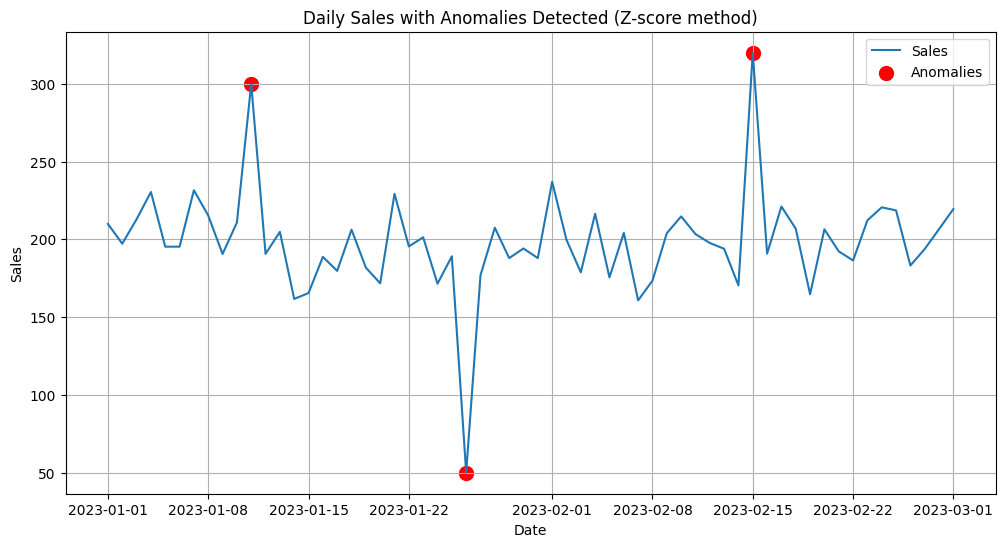

In [1]:
# write your code from here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load sample sales data (simulate or load your CSV)
# Simulating daily sales data for 60 days with some anomalies
np.random.seed(42)
days = pd.date_range(start='2023-01-01', periods=60)
sales = np.random.normal(loc=200, scale=20, size=60)

# Inject anomalies
sales[10] = 300  # High anomaly
sales[25] = 50   # Low anomaly
sales[45] = 320  # High anomaly

data = pd.DataFrame({'Date': days, 'Sales': sales})

# Step 2: Calculate mean, std and Z-score for sales
mean_sales = data['Sales'].mean()
std_sales = data['Sales'].std()

data['Z_score'] = (data['Sales'] - mean_sales) / std_sales

# Step 3: Identify anomalies (Z-score > 3 or < -3)
data['Anomaly'] = data['Z_score'].apply(lambda x: True if abs(x) > 3 else False)

# Print anomalies
print("Anomalies Detected:")
print(data[data['Anomaly']])

# Step 4: Visualize sales and anomalies
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Sales'], label='Sales')
plt.scatter(data.loc[data['Anomaly'], 'Date'], 
            data.loc[data['Anomaly'], 'Sales'], 
            color='red', label='Anomalies', s=100)
plt.title('Daily Sales with Anomalies Detected (Z-score method)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()
